# Introducción al numpy con aplicación  a las señales de audio
## Juntando Vectores y Matrices
En este  ejercicio  veremos como crear nd-arrays más grandes mediante yuxtaposición de vectores más pequeños. Veremos:
* Cómo unir dos vectores de una dimensión en un vector de una dimensión más largo o en una matriz con dos filas o columnas
* Cómo insertar "silencio" al principio, en medio o al final de un audio.
* Cómo convertir en unidimensional una matriz de 1xN o Nx1
* Cómo convertir un vector unidimensional (shape (N,)) en una matriz de 1xN o Nx1 bidimensional.

Como en otros módulos la mecánica que seguiremos será visualizar con ejemplos pequeños la operación a realizar, para luego aplicarsela a la señal de audio.

In [1]:
#Importaremos los módulos necesarios
%matplotlib inline
import numpy as np
import upv_audio
import matplotlib.pyplot as plt
import matplotlib
import mediapy # Para leer imagenes
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

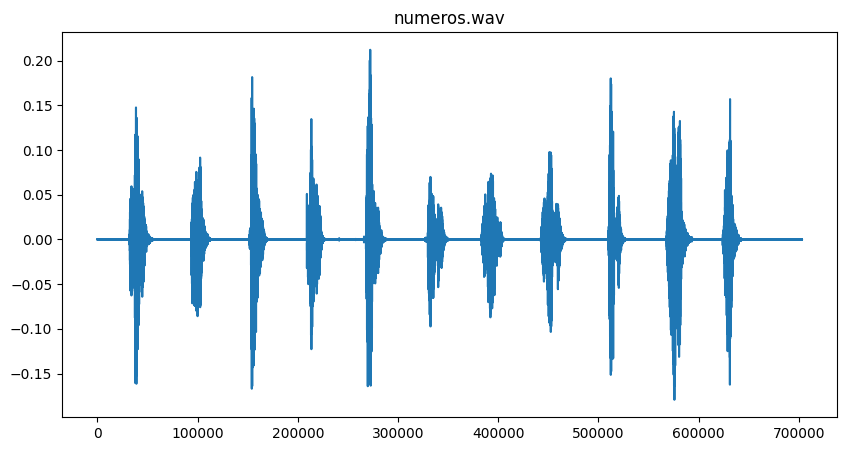

In [2]:
fs1,x1=upv_audio.read('audios/numeros.wav')
fs2,x2=upv_audio.read('audios/Xiaomi.wav')
_=plt.plot(x1)
_=plt.title('numeros.wav')

## Stack
La función stack junta varios vectores del mismo tamaño añadiendo una nueva dimensión

### Creando una señal stereo a partir de una señal mono
Simplemente crearemos una matriz con dos columnas idénticas

In [3]:
print(x1.shape)
x1stereo = None
# Debe tener dos columnas idénticas cada una de las cuales sea x1
### BEGIN SOLUTION
x1stereo=np.stack((x1,x1),axis=1)
### END SOLUTION
# stack añade una nueva dimensión.
print(x1stereo.shape)

(702938,)
(702938, 2)


### Crear una imagen color (con 3 componentes de color) a partir de una imagen monocroma

Tamaño: (480, 640)  dtype: uint8


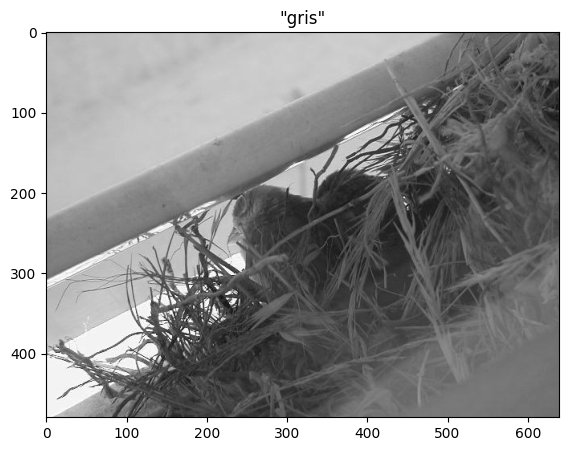

In [4]:
gris=mediapy.read_image('imagenes/monocroma.jpg')
print('Tamaño:',gris.shape,' dtype:',gris.dtype)
_=plt.imshow(gris,cmap='gray')
_=plt.title('"gris"')

Tamaño: (480, 640, 3)  dtype: uint8


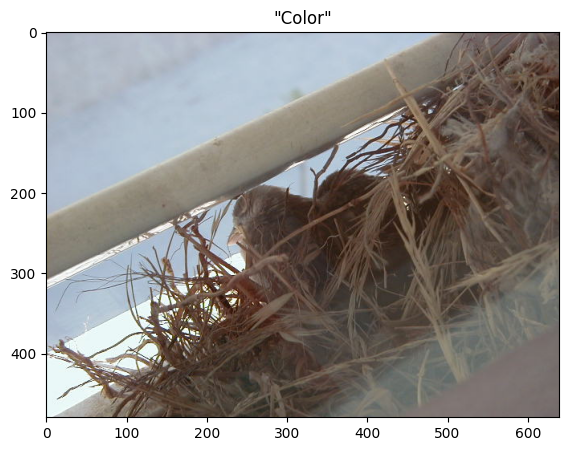

In [5]:
color=mediapy.read_image('imagenes/gorrion.jpg')
print('Tamaño:',color.shape,' dtype:',color.dtype)
_=plt.imshow(color)
_=plt.title('"Color"')

In [6]:
# Ahora lo que haremos será crear una imagen con las 3 componentes de color iguales
def gris2color(gris):
    y = None
    ###  BEGIN SOLUTION
    y = np.stack([gris]*3,axis=2)
    ### END SOLUTION
    return y


(480, 640, 3)


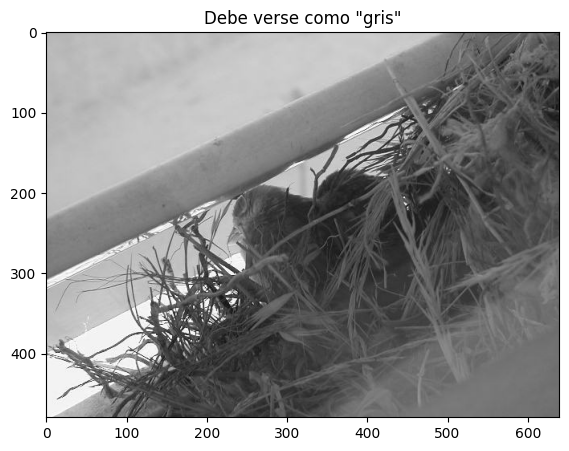

In [7]:
# Comprobación
gris_3can = gris2color(gris)
print(gris_3can.shape)
assert gris_3can.shape == (480,640,3)
_=plt.imshow(gris_3can)
_=plt.title('Debe verse como "gris"')

In [8]:
# Comprobación

### BEGIN HIDDEN TESTS
x=np.random.rand(314,217)
# AUTOTEST gris2color(x)
### END HIDDEN TESTS

## Unir dos señales en una más larga
Si quisiéramos crear una señal mono que fuera la concatenación de dos señales mono más cortas:



In [9]:
print(x1.shape)
# Concatenar dos señales mono

### BEGIN SOLUTION
# Este se lo hacemos y no se lo puntuamos
x1larga=np.concatenate((x1,x1),axis=0)
x1larga=np.concatenate((x1,x1))# Segunda manera. Por defecto axis =0
### END SOLUTION
x1larga=np.concatenate((x1,x1),axis=0)
x1larga=np.concatenate((x1,x1))# Segunda manera. Por defecto axis =0

print(x1larga.shape)

(702938,)
(1405876,)


In [10]:
#Si la señal fuese stereo
x2larga = None # Concatenar 2 veces la señal stereo x2

### BEGIN SOLUTION
# Este se lo valoramos
x2larga=np.concatenate((x2,x2))
### END SOLUTION

print(x2.shape,x2larga.shape)

(340992, 2) (681984, 2)


In [11]:
# Comprobación
### BEGIN HIDDEN TESTS
assert x2larga.shape == (681984,2), "Dimensiones incorrectas de x2larga"
### END HIDDEN TESTS

A continuación programe una función que devuelva una señal cuadrafónica, es decir que sea una matriz de 4 columnas cada una correspondiente a un canal de audio:

* Debe funcionar con señales mono, replicando la señal 4 veces. La señal mono puede tener shape:
    * (N,)
    * (N,1)

* Debe funcionar con señales stereo (L,R) y debe dar como resultado (L,R,L,R) 

In [12]:
def creaCuadrafonico(x):
    ''' Crea una señal cuadrafónica a partir de una señal mono o stereo
    En el caso de mono, el canal se replica 4 veces
    En el caso de stereo la pareja de canales se replica 2 veces, (L,R) ---> (L,R,L,R)
    '''
    y= None
    ### BEGIN SOLUTION
    if x.ndim ==1:
        y =np.stack([x]*4,axis=1)
    elif x.shape[1]==1:
        y=np.concatenate([x]*4,axis=1)
    else:
        y=np.concatenate([x]*2,axis=1)
    ### END SOLUTION
    return y

In [13]:
# Comprobaciones. Ejecutar esta celda para ver que no da errores.
# Si hay errores corrregir el código anterior


mono1=np.ones((100,))
mono2=np.ones((100,1))*2
stereo=np.ones((100,2))*3

cuadra1=creaCuadrafonico(mono1)
cuadra2=creaCuadrafonico(mono2)
cuadra3=creaCuadrafonico(stereo)
print(cuadra1.shape)
print(cuadra2.shape)
print(cuadra3.shape)
assert cuadra1 is not None and cuadra2 is not None and cuadra3 is not None, "La función no devuelve creaCuadrafonico nada"
assert cuadra1.shape == (100,4), "Resultado incorrecto con señal mono (N,)"
assert cuadra2.shape == (100,4), "Resultado incorrecto con señal mono (N,1)"
assert cuadra3.shape == (100,4), "Resultado incorrecto con señal stereo"

for k in range(cuadra1.shape[1]):
    assert np.all(mono1==cuadra1[:,k]), "El contenido del resultado para mono (N,) no es correcto"

for k in range(cuadra2.shape[1]):
    assert np.all(mono2[:,0]==cuadra2[:,k]), "El contenido del resultado para mono (N,1) no es correcto"    

for k in range(cuadra3.shape[1]):
    assert np.all(stereo[:,k%2]==cuadra3[:,k]), "El contenido del resultado para stereo no es correcto"

(100, 4)
(100, 4)
(100, 4)


In [14]:
# Comprobación-Evaluación
### BEGIN HIDDEN TESTS
np.random.seed(1)
n1=np.random.randint(low=100,high=200)
mono1=np.random.randn(n1)
n2=np.random.randint(low=100,high=200)
mono2=np.random.randn(n2,1)
n3=np.random.randint(low=100,high=200)
stereo=np.random.randn(n3)

### AUTOTEST creaCuadrafonico(mono1)
### AUTOTEST creaCuadrafonico(mono2)
### AUTOTEST creaCuadrafonico(stereo)


### END HIDDEN TESTS

## Insertar silencio al principio, al final o en medio de una señal
En este apartado veremos como usando concatenate es posible insertar ceros en cualquier posición de una señal

In [15]:
# En este primer ejemplo se muestra como insertar ceros al principio de una señal mono

dur_seg= 2
dur_muestras = int(dur_seg*fs1) # es importante forzar a que sea entero
silencio = np.zeros(dur_muestras)

silencio_principio = np.concatenate((silencio,x1))
silencio_final = np.concatenate((x1,silencio))
silencio_intermedio=np.concatenate((x1[:300000],silencio,x1[300000:]))# Punto de inserción muestra 300000

Text(0.5, 1.0, 'Silencio Intermedio')

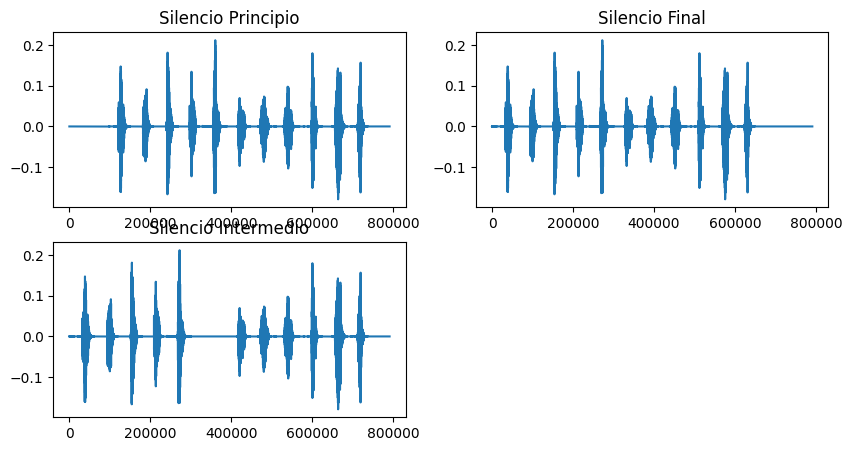

In [16]:
_=plt.subplot(2,2,1)
plt.plot(silencio_principio)
plt.title('Silencio Principio')
_=plt.subplot(2,2,2)
plt.plot(silencio_final)
plt.title('Silencio Final')
_=plt.subplot(2,2,3)
plt.plot(silencio_intermedio)
plt.title('Silencio Intermedio')

### Ejercicio

A continuación debe programar una función que añada silencios al principio y al final de una señal de audio **tanto si es mono como si es stereo**.

Recibe como parametros:

* x: la señal mono o estereo

* fs

* dur_sg_silencio_inicial

* dur_sg_silencio_final

In [17]:
def anyadir_silencios(x,fs,dur_sg_silencio_inicial,dur_sg_silencio_final):
    '''
    x: senyal mono o stereo
    fs: frecuencia de muestreo
    dur_sg_silencio_inicial
    dur_sg_silencio_final

    Devuelve la señal con los silencios al princpio y el final
    '''

    y=None
    ### BEGIN SOLUTION
    n_ini = int(fs*dur_sg_silencio_inicial)
    n_fin = int(fs*dur_sg_silencio_final)
    y=x.copy()

    if n_ini >0:
        if x.ndim ==1:
            s_ini=np.zeros(n_ini)
        else:
            s_ini = np.zeros((n_ini,x.shape[1]))
        y=np.concatenate((s_ini,y))
    if n_fin >0:
        if x.ndim ==1:
            s_fin=np.zeros(n_fin)
        else:
            s_fin = np.zeros((n_fin,x.shape[1]))
        y=np.concatenate((y,s_fin))                             
    ### END SOLUTION
    return y

In [18]:
# Comprobaciones Debe comprobar que el resultado de todas las operaciones es correcto
fs1,x1=upv_audio.read('audios/numeros.wav')
fs2,x2=upv_audio.read('audios/Xiaomi.wav')
y1=anyadir_silencios(x1,fs1, 3.0, 4.0)
print(x1.shape,'y2.shape=',y1.shape)

y2=anyadir_silencios(x1,fs1, 0, 4.0)
print(x1.shape,'y2.shape=',y2.shape)
y3=anyadir_silencios(x1,fs1, 3.0, 0)
print(x1.shape,'y3.shape=',y3.shape)

y4=anyadir_silencios(x2,fs2, 3.0, 4.0)
print(x2.shape,'y4.shape=',y4.shape)

y5=anyadir_silencios(x2,fs2, 0, 4.0)
print(x2.shape,'y5.shape=',y5.shape)
y6=anyadir_silencios(x2,fs2, 3.0, 0)
print(x2.shape,'y6.shape=',y6.shape)
# Revisar los valores y comprobar que no hay errores



(702938,) y2.shape= (1011638,)
(702938,) y2.shape= (879338,)
(702938,) y3.shape= (835238,)
(340992, 2) y4.shape= (649692, 2)
(340992, 2) y5.shape= (517392, 2)
(340992, 2) y6.shape= (473292, 2)


In [19]:
#Comprobación automática
### BEGIN HIDDEN TESTS
np.random.seed(2)
mono=np.random.randn(750000)
stereo=np.random.randn(750000,2)
### AUTOTEST anyadir_silencios(mono,16000,1,3)
### AUTOTEST anyadir_silencios(stereo,16000,1,3)
### AUTOTEST anyadir_silencios(mono,32000,1,0)
### AUTOTEST anyadir_silencios(stereo,16000,0,3)
### END HIDDEN TESTS